In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle as pkl
import json
import requests
import datetime as dt

from CP_trend import * #expand_months_manual, findTTT, plot_t0

from pandas.io.json import json_normalize
%load_ext autoreload
%autoreload 2
%load_ext autotime

In [2]:
#read data
#market_data = pd.read_csv('df_cnt_all_112019.csv',index_col=0)
#load combined
market_data = pd.read_csv('df_cnt_comb120119.csv',index_col=0)
search_data = pkl.load(open("./data/search_data_2019-09.pkl", "rb"))

time: 325 ms


In [3]:
#set trends and trends t0
trends = ['neon', 'paper bag waist', 'high waisted jeans','animal print', 'open shoulder', 'puff sleeve', 'black cargo pants']
trends_t0 = [return_t0(t,search_data) for t in trends]


calculating t0 for neon
calculating t0 for paper bag waist
calculating t0 for high waisted jeans
calculating t0 for animal print
calculating t0 for open shoulder
calculating t0 for puff sleeve
calculating t0 for black cargo pants
time: 430 ms


calculating t0 for puff sleeve


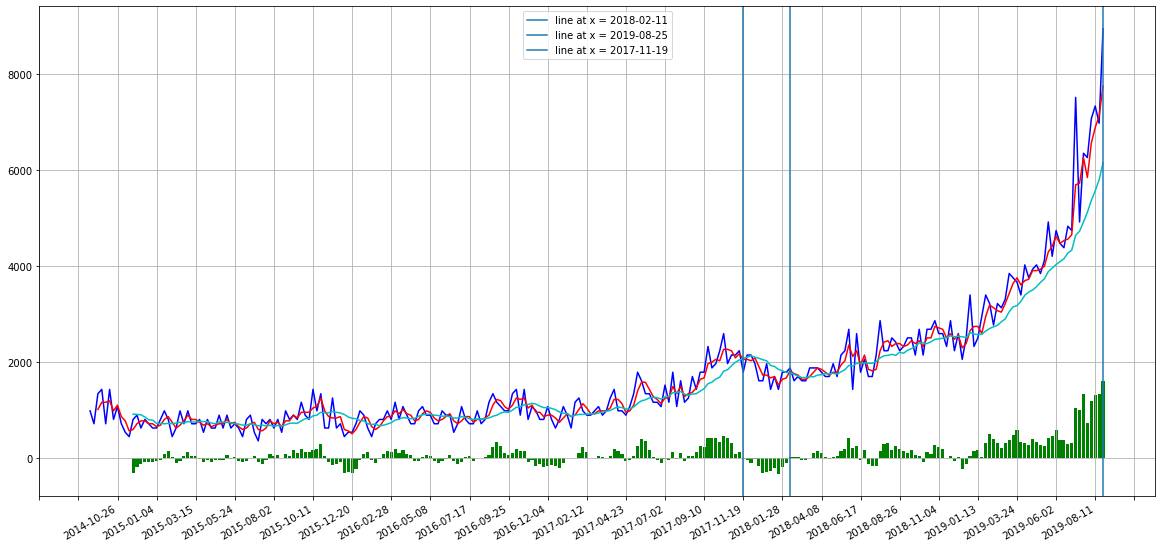

'2018-02-11'

time: 1.37 s


In [4]:
#check one trend
plot_t0('puff sleeve', search_data)

In [5]:
week_cols = ['3/25/18', '4/1/18', '4/8/18', '4/15/18', '4/22/18', '4/29/18',
       '5/6/18', '5/13/18', '5/20/18', '5/27/18', '6/3/18', '6/10/18',
       '6/17/18', '6/24/18', '7/1/18', '7/8/18', '7/15/18', '7/22/18',
       '7/29/18', '8/5/18', '8/12/18', '8/19/18', '8/26/18', '9/2/18',
       '9/9/18', '9/16/18', '9/23/18', '9/30/18', '10/7/18', '10/14/18',
       '10/21/18', '10/28/18', '11/4/18', '11/11/18', '11/18/18', '11/25/18',
       '12/2/18', '12/9/18', '12/16/18', '12/23/18', '12/30/18', '1/6/19',
       '1/13/19', '1/20/19', '1/27/19', '2/3/19', '2/10/19', '2/17/19',
       '2/24/19', '3/3/19', '3/10/19', '3/17/19', '3/24/19', '3/31/19',
       '4/7/19', '4/14/19', '4/21/19', '4/28/19', '5/5/19', '5/12/19',
       '5/19/19', '5/26/19', '6/2/19', '6/9/19', '6/16/19', '6/23/19',
       '6/30/19', '7/7/19', '7/14/19', '7/21/19', '7/28/19', '8/4/19',
       '8/11/19', '8/18/19', '8/25/19', '9/1/19', '9/8/19', '9/15/19',
       '9/22/19', '9/29/19', '10/6/19', '10/13/19', '10/20/19']

time: 3.8 ms


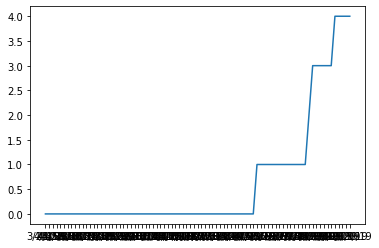

time: 900 ms


In [6]:
#single retailer trend inventory check
#plot the inventory curve
trend1W = '%20'.join(trends[1].split())
imx_ppr = market_data[(market_data['trend'] == trend1W) & (market_data['Retail Site'] == "Alice + Olivia")]
week_cols = list(imx_ppr.columns[6:])
imx_pprT = imx_ppr[week_cols].T
imx_pprT.columns = ['count']

plt.plot(imx_pprT)

37
['Alice + Olivia', 'Revolve', 'Shopbop.com', 'Bloomingdales', 'Yoox.com', 'SSense', 'Nordstrom', 'Intermix', 'Torrid', 'Zara', 'Asos', 'Forever 21', 'Boohoo', 'Topshop', 'H&M', 'Rue21', 'Urban Outfitters', 'River Island', 'Next', '24 S\x8fvres', 'Net-a-porter', 'MODA OPERANDI', 'Neiman Marcus', 'Saks Fifth Avenue', 'LUISAVIAROMA', 'Bergdorf Goodman', 'Barneys New York', 'Farfetch', 'Fendi', 'Walmart', "Macy's", 'Kohls', 'JCPenney', 'Target', 'Belk', 'American Eagle', 'J.Crew']
calculating t0 for neon


/Users/micaelaflores/anaconda3/lib/python3.6/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)
/Users/micaelaflores/anaconda3/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 143 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/micaelaflores/anaconda3/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 143 missing from current font.
  font.set_text(s, 0, flags=flags)


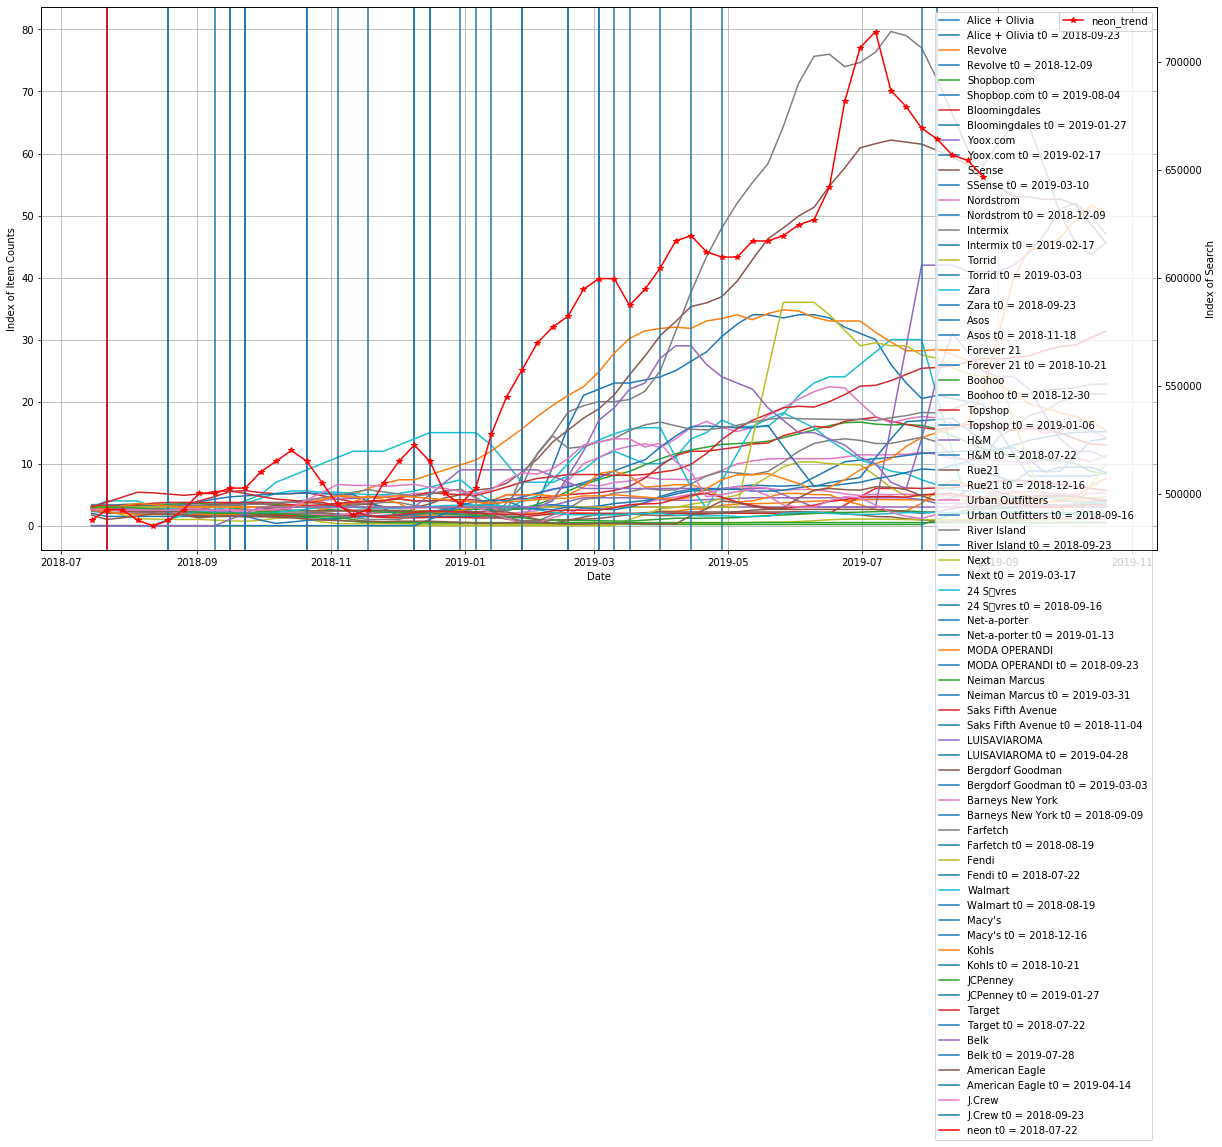

,Date,Max Slope,t0
Alice + Olivia,2019-02-17,6.500000,2018-09-23
Revolve,2019-04-28,0.548387,2018-12-09
Shopbop.com,2019-08-18,0.842105,2019-08-04
Bloomingdales,2019-06-23,1.333333,2019-01-27
Yoox.com,2019-02-17,0.600000,2019-02-17
SSense,2019-10-20,0.473684,2019-03-10
Nordstrom,2019-01-06,1.120000,2018-12-09
Intermix,2019-09-01,3.500000,2019-02-17
Torrid,2018-10-07,0.315789,2019-03-03
Zara,2019-04-14,3.000000,2018-09-23


time: 2.9 s


In [7]:
#do one for Neon
all_ret_neon = val_retailers(market_data, trends[0])
print(len(all_ret_neon))
print(all_ret_neon)
plot_multicurve(search_data, market_data, trends[0], all_ret_neon, 3,week_cols, True, True)

In [8]:
#do scatter plot
res_neon = getdelta_t0(search_data, market_data, all_ret_neon, trends[0], trends_t0[0], week_cols)

calculating t0 for neon
time: 1.13 s


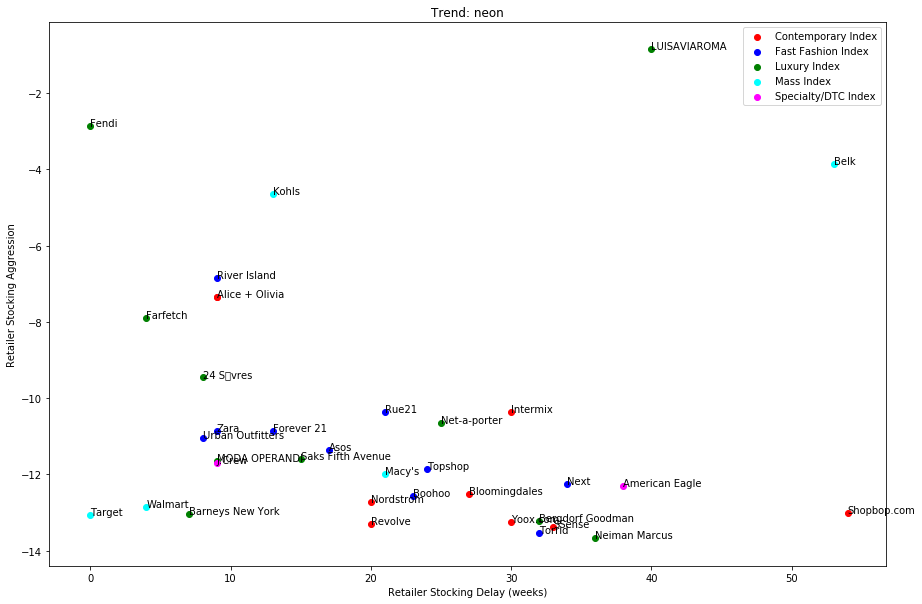

time: 445 ms


In [9]:
#scatter no log
plot_trend_scatterplot(res_neon,trends[0], plot_log = False)

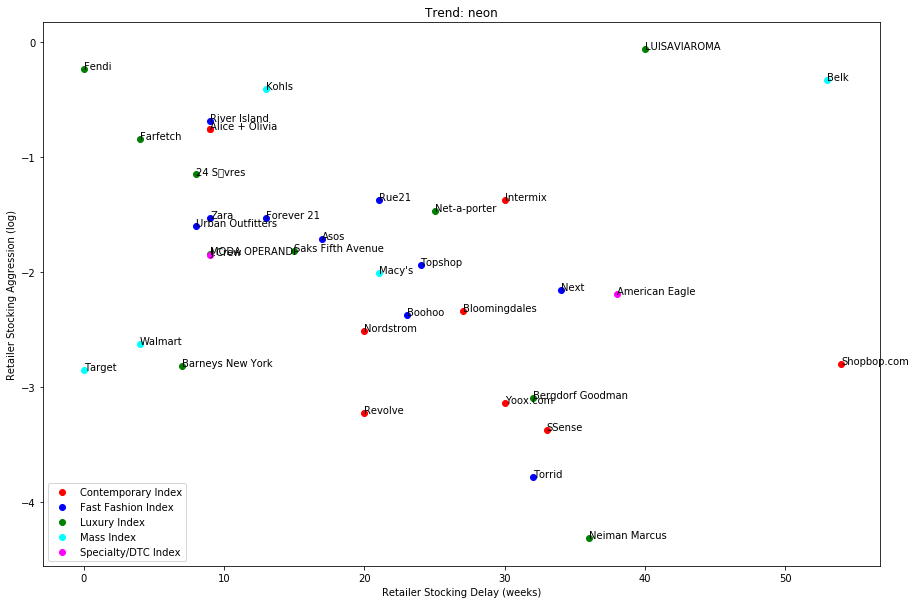

time: 434 ms


In [10]:
#scatter with log delta slope
plot_trend_scatterplot(res_neon,trends[0], plot_log = True)

calculating t0 for neon


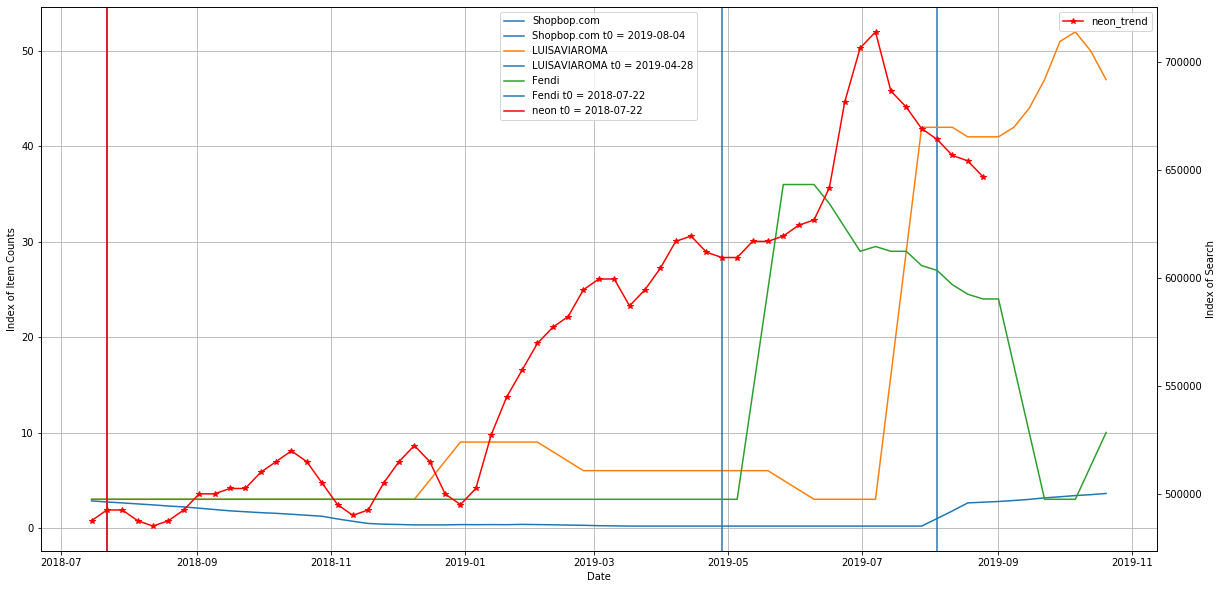

,Date,Max Slope,t0
Shopbop.com,2019-08-18,0.842105,2019-08-04
LUISAVIAROMA,2019-07-14,13.000000,2019-04-28
Fendi,2019-05-12,11.000000,2018-07-22
neon_trend,2019-06-23,9.011317,2018-07-22


time: 517 ms


In [11]:
plot_multicurve(search_data, market_data, "neon", ['Shopbop.com', 'LUISAVIAROMA', 'Fendi'], 3, week_cols, True,True)

51
['AllSaints', 'Revolve', 'Shopbop.com', 'Aritzia', 'Bloomingdales', 'SSense', 'Nordstrom', 'Intermix', 'Forward By Elyse Walker', 'Torrid', 'Eloquii', 'Simply Be', 'Zara', 'Asos', 'Forever 21', 'Boohoo', 'Topshop', 'H&M', 'Rue21', 'Urban Outfitters', 'River Island', 'Next', '24 S\x8fvres', 'Net-a-porter', 'matchesfashion.com', 'MODA OPERANDI', 'Neiman Marcus', 'Saks Fifth Avenue', 'LUISAVIAROMA', 'Bergdorf Goodman', 'Olivela', 'Farfetch', 'Walmart', 'Avenue', 'Lord & Taylor', "Macy's", 'Kohls', 'JCPenney', 'Target', 'Dillards', 'Belk', 'Old Navy', 'Abercrombie & Fitch', 'Gap', 'American Eagle', 'Club Monaco', 'Madewell', 'J.Crew', 'Ann Taylor', 'Banana Republic', 'Reformation']
calculating t0 for puff sleeve


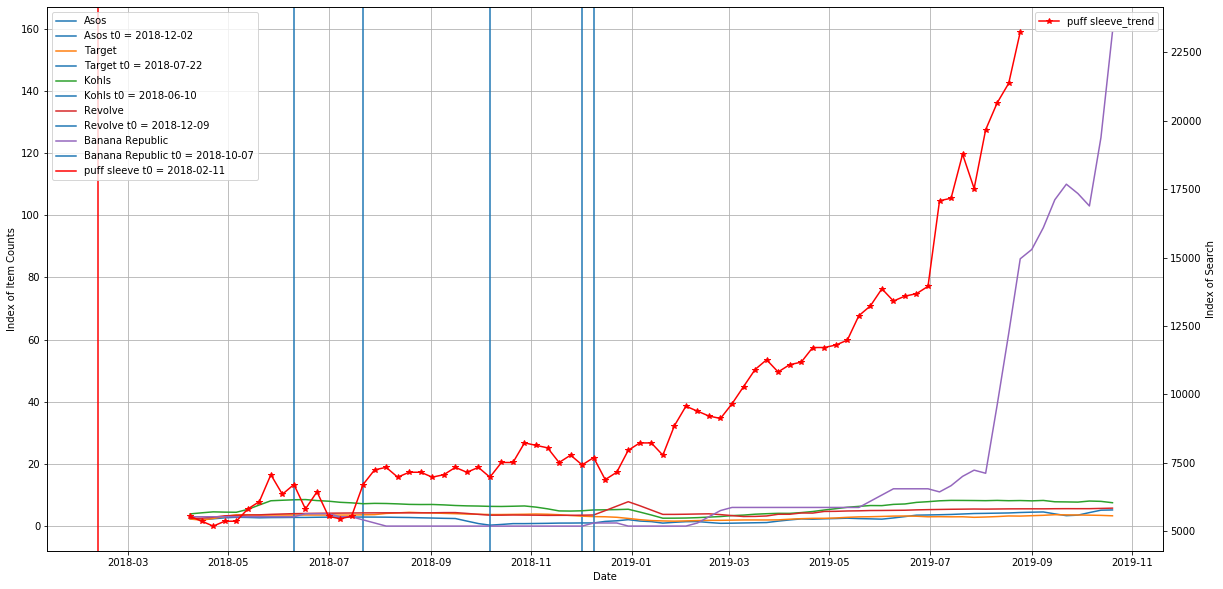

time: 983 ms


In [12]:
#check puff sleeve
#see that banana republic is an outlier - started doing log delta slope
all_ret_pra = val_retailers(market_data, 'puff sleeve')
print(len(all_ret_pra))
print(all_ret_pra)
res = plot_multicurve(search_data, market_data, 'puff sleeve', ['Asos', 'Target', 'Kohls', 'Revolve', 'Banana Republic'], 3, week_cols, True,True)

calculating t0 for puff sleeve


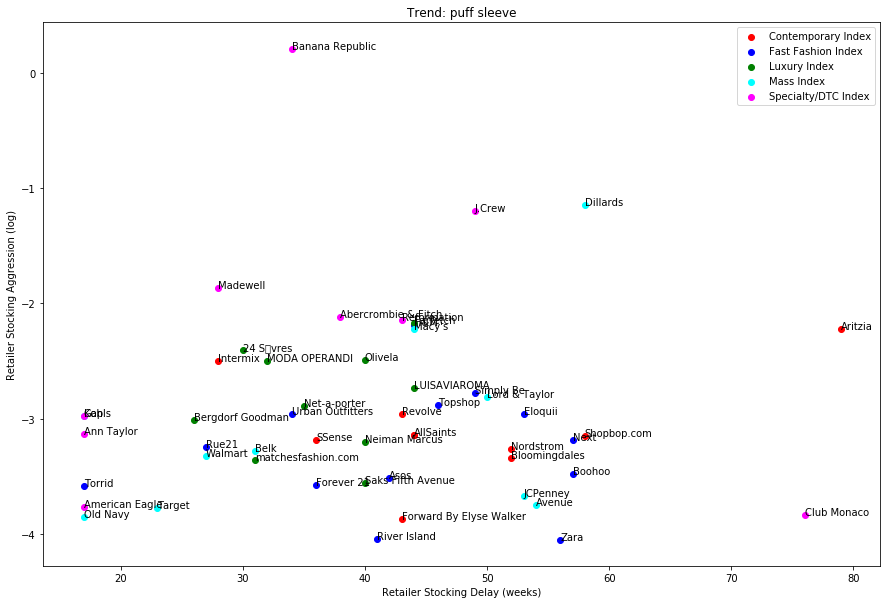

time: 2.01 s


In [13]:
res_ps = getdelta_t0(search_data, market_data, all_ret_pra, 'puff sleeve', '2018-02-11', week_cols)
plot_trend_scatterplot(res_ps,'puff sleeve', plot_log = True)

In [14]:
combined_df = combined_retailers_and_trends(search_data,market_data,trends, week_cols)

calculating t0 for neon
calculating t0 for paper bag waist
calculating t0 for high waisted jeans
calculating t0 for animal print
calculating t0 for open shoulder
calculating t0 for puff sleeve
calculating t0 for black cargo pants
calculating t0 for neon
calculating t0 for paper bag waist
calculating t0 for high waisted jeans
calculating t0 for animal print
calculating t0 for open shoulder
calculating t0 for puff sleeve
calculating t0 for black cargo pants
time: 10.9 s


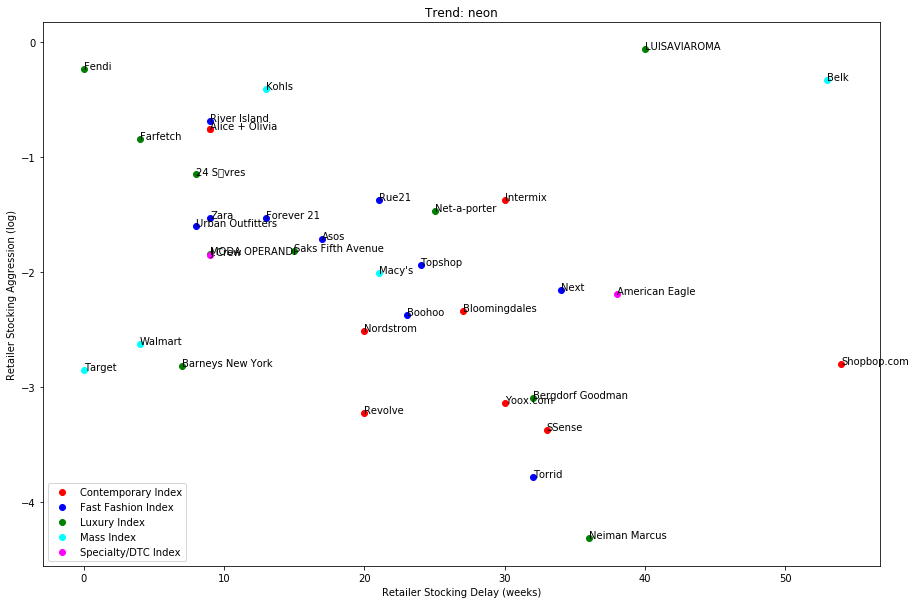

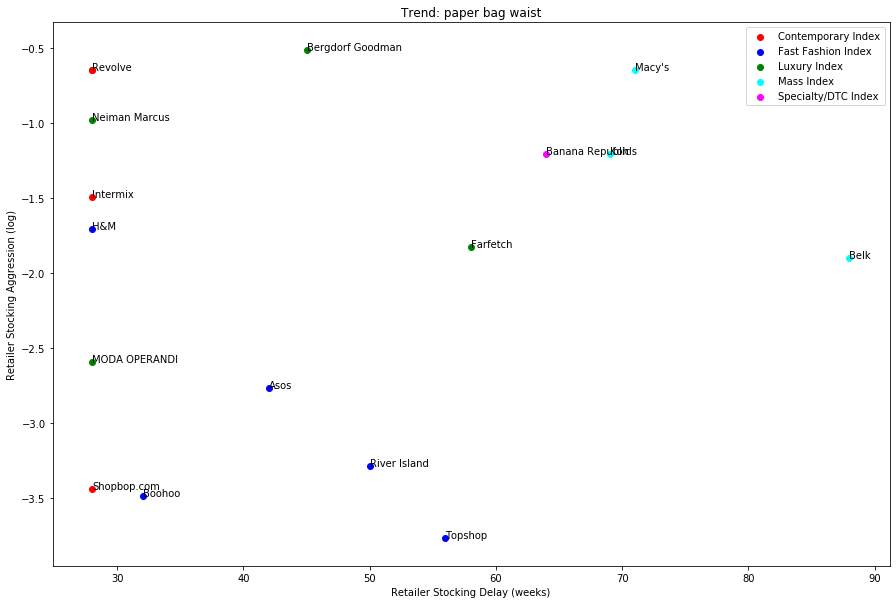

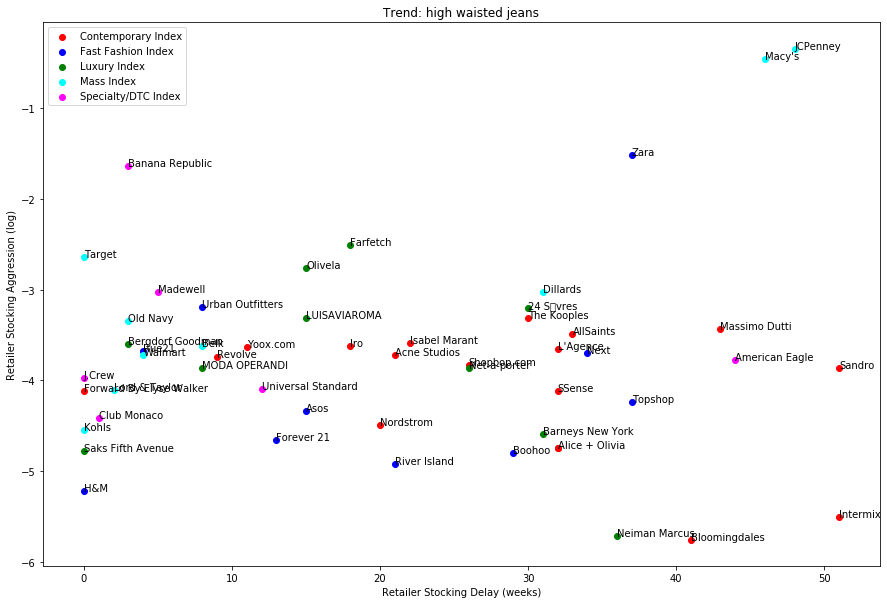

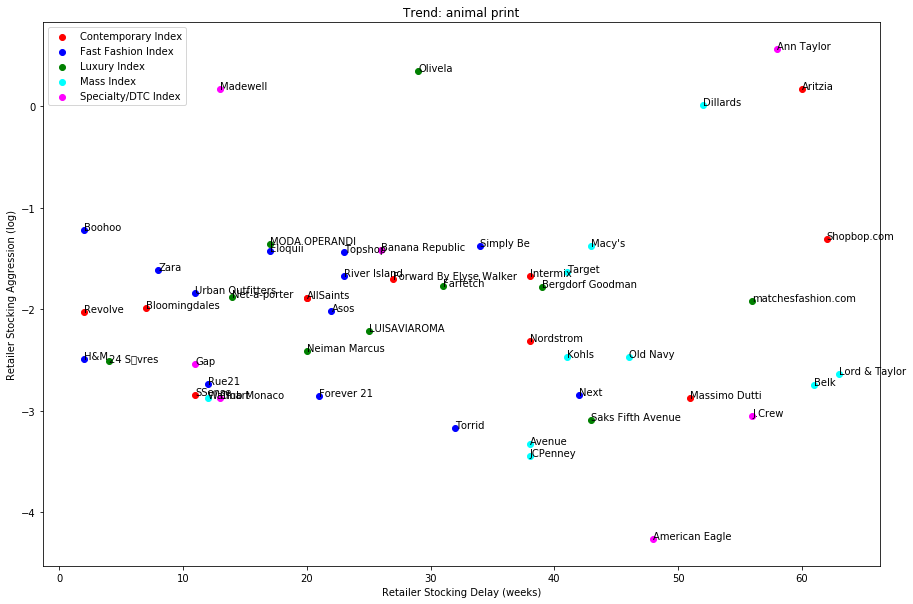

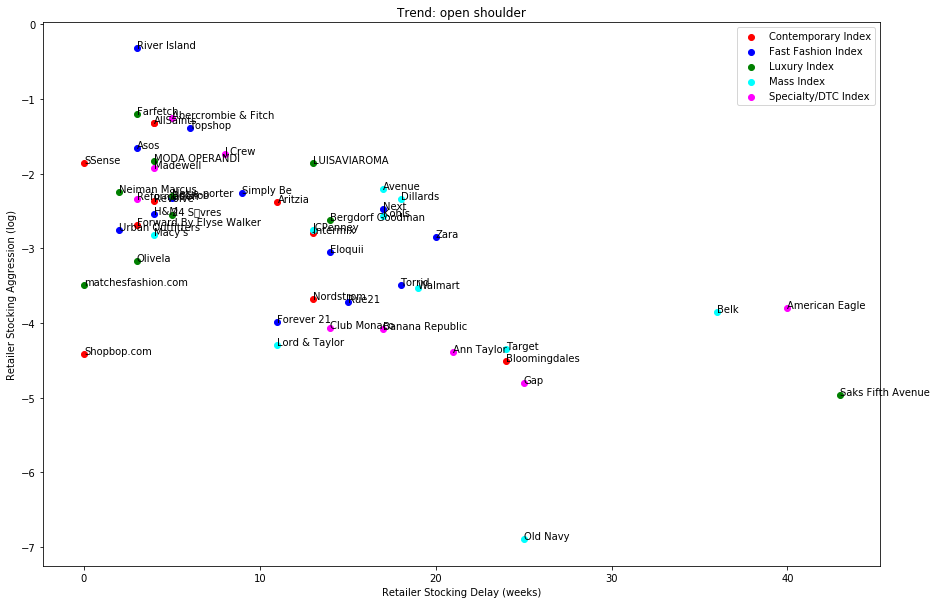

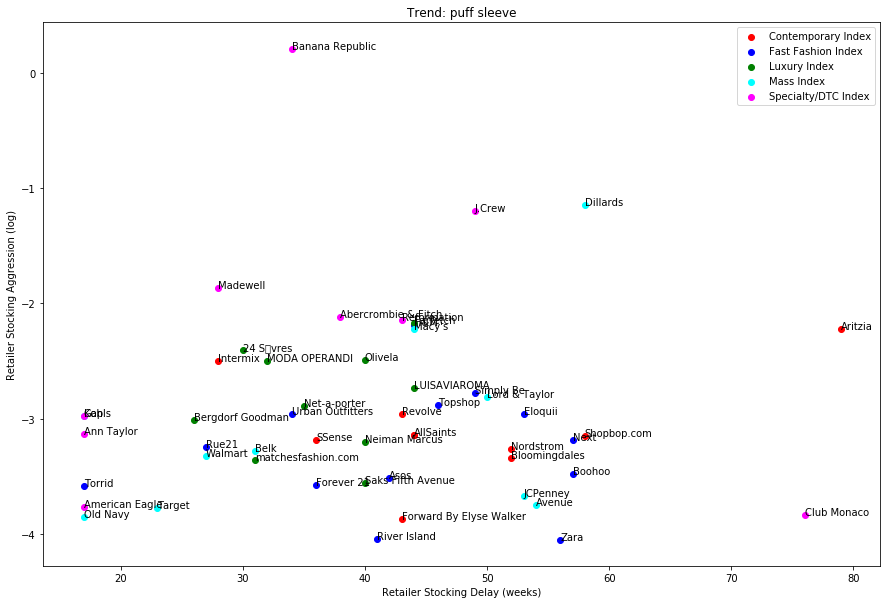

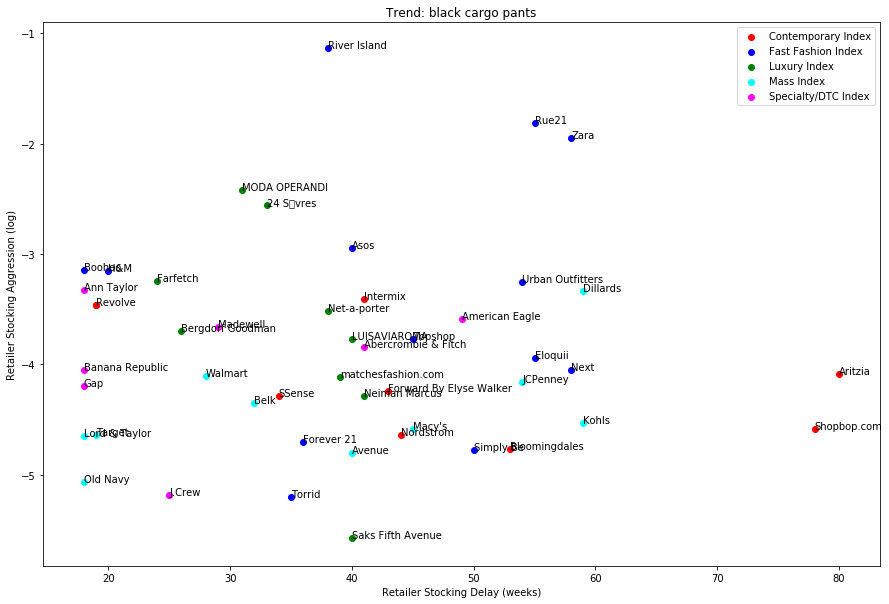

time: 3.65 s


In [15]:
for i, trend in enumerate(trends):
    res_i = combined_df[combined_df.trend == trend]
    plot_trend_scatterplot(res_i, trend, plot_log = True)

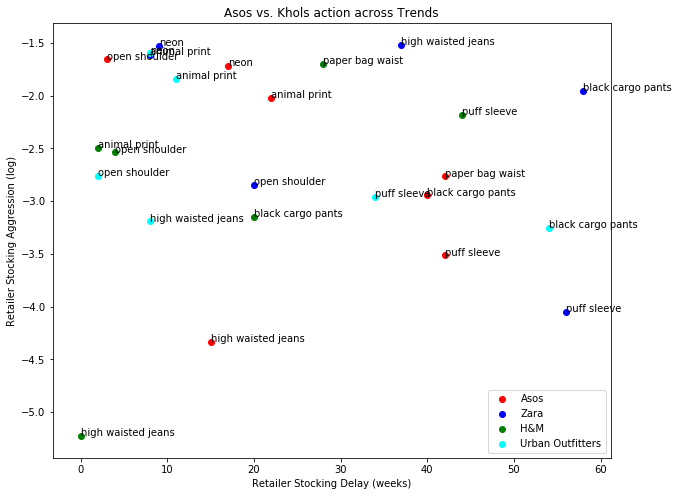

time: 290 ms


In [16]:
plotMultRetScatter(combined_df, ["Asos", "Zara", "H&M", "Urban Outfitters"])

In [17]:
combined_df.head(3)

,trend,trend_t0,trend_max_slope,retailer,Market Index,ret_t0,delta_t0_wk,m_slope_date,max_slope,del_slope,del_log_slope
0,neon,2018-07-22,13.857292,Alice + Olivia,Contemporary Index,2018-09-23,9.0,2019-02-17,6.500000,-7.357292,-0.757009
1,neon,2018-07-22,13.857292,Revolve,Contemporary Index,2018-12-09,20.0,2019-04-28,0.548387,-13.308905,-3.229585
2,neon,2018-07-22,13.857292,Shopbop.com,Contemporary Index,2019-08-04,54.0,2019-08-18,0.842105,-13.015187,-2.800662


time: 14.2 ms


In [18]:
### Take average and plot trend scatter, trend = 'average'
combined_df_avg = combined_weighted_data(combined_df, market_data, week_cols)

time: 22.8 ms


In [19]:
combined_df_avg.head(3)

,retailer,Market Index,weighted_delta_t0_wk,weighted_del_log_slope
0,24 Svres,Luxury Index,18.333333,-2.397194
1,Abercrombie & Fitch,Specialty/DTC Index,28.000000,-2.401571
2,Acne Studios,Contemporary Index,21.000000,-3.716198


time: 7.71 ms


In [20]:
#Fendi is an outlier so remove Fendi
#trend_weight_df(market_data, "Fendi", week_cols)
combined_df_avg = combined_df_avg[combined_df_avg.retailer != "Fendi"]

time: 1.93 ms


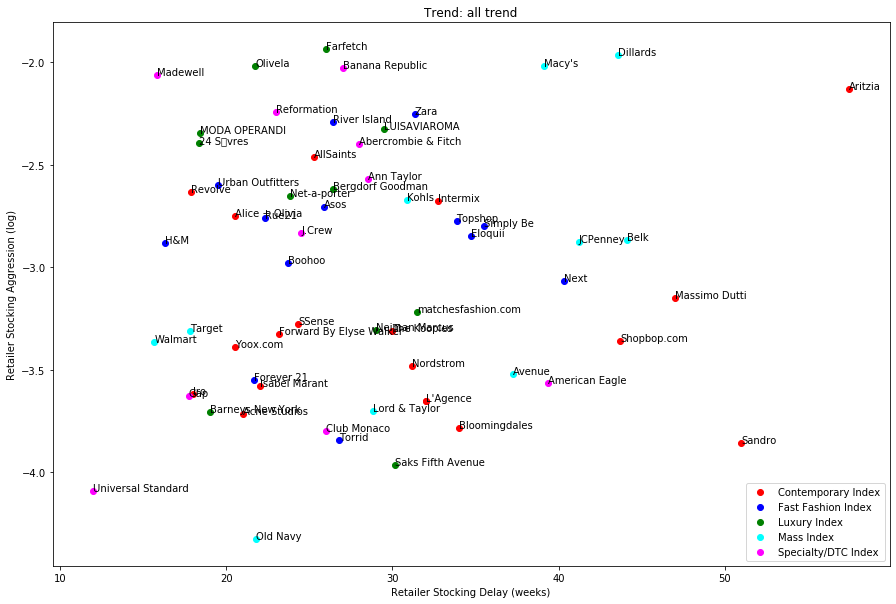

time: 678 ms


In [21]:
plot_trend_scatterplot(combined_df_avg, "all trend", plot_log = True, weight_cols=True)


/Users/micaelaflores/anaconda3/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 143 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/micaelaflores/anaconda3/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 143 missing from current font.
  font.set_text(s, 0, flags=flags)


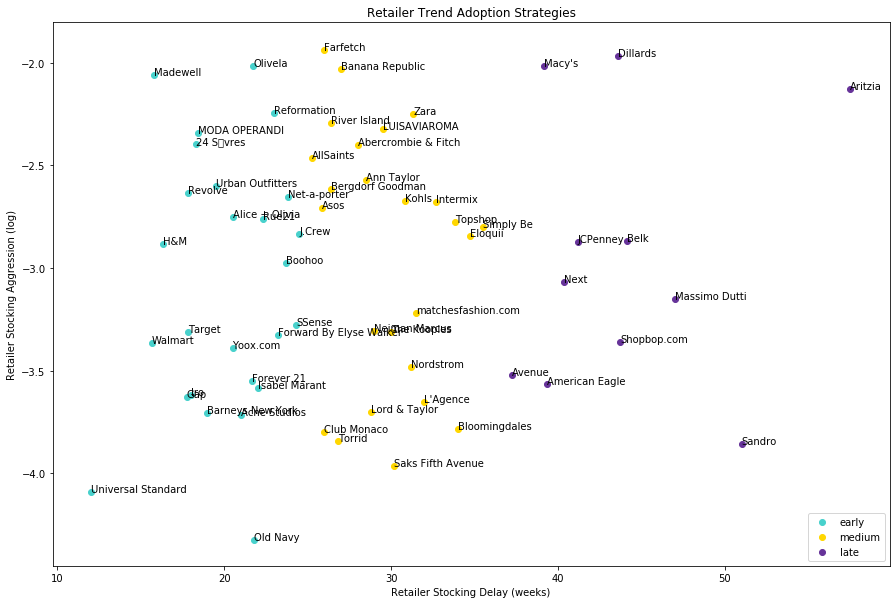

time: 606 ms


In [27]:
#cluster
combined_pred_df, centers = kMeansClustering(combined_df_avg,3,makeplot=True, weight_cols=True)

In [23]:
combined_pred_df[combined_pred_df["Market Index"] == "Fast Fashion Index"]

,retailer,Market Index,weighted_delta_t0_wk,weighted_del_log_slope,Pred Label
8,Asos,Fast Fashion Index,25.857143,-2.707749,medium
15,Boohoo,Fast Fashion Index,23.714286,-2.978009,early
18,Eloquii,Fast Fashion Index,34.750000,-2.846597,medium
21,Forever 21,Fast Fashion Index,21.666667,-3.549850,early
24,H&M,Fast Fashion Index,16.333333,-2.882888,early
40,Next,Fast Fashion Index,40.333333,-3.068161,late
46,River Island,Fast Fashion Index,26.428571,-2.294275,medium
47,Rue21,Fast Fashion Index,22.333333,-2.762353,early
52,Simply Be,Fast Fashion Index,35.500000,-2.798485,medium
55,Topshop,Fast Fashion Index,33.857143,-2.775762,medium


time: 14.4 ms


In [24]:
pred_df_agg = makeScoreCard(combined_df, combined_pred_df,trends)

time: 224 ms


In [25]:
#check fast fashion
pred_df_agg[pred_df_agg["Market Index"] == "Fast Fashion Index"]

,retailer,Market Index,weighted_delta_t0_wk,weighted_del_log_slope,Pred Agg,Pred neon,Pred paper bag waist,Pred high waisted jeans,Pred animal print,Pred open shoulder,Pred puff sleeve,Pred black cargo pants
8,Asos,Fast Fashion Index,25.857143,-2.707749,medium,early,medium,early,early,early,medium,medium
15,Boohoo,Fast Fashion Index,23.714286,-2.978009,early,medium,early,medium,early,early,late,early
18,Eloquii,Fast Fashion Index,34.750000,-2.846597,medium,X,X,X,early,medium,late,late
20,Forever 21,Fast Fashion Index,21.666667,-3.549850,early,early,X,early,early,medium,medium,medium
23,H&M,Fast Fashion Index,16.333333,-2.882888,early,X,early,early,early,early,medium,early
39,Next,Fast Fashion Index,40.333333,-3.068161,late,medium,X,medium,medium,medium,late,late
45,River Island,Fast Fashion Index,26.428571,-2.294275,medium,early,medium,medium,early,early,medium,medium
46,Rue21,Fast Fashion Index,22.333333,-2.762353,early,medium,X,early,early,medium,early,late
51,Simply Be,Fast Fashion Index,35.500000,-2.798485,medium,X,X,X,medium,early,medium,late
54,Topshop,Fast Fashion Index,33.857143,-2.775762,medium,medium,medium,late,early,early,medium,medium


time: 18.5 ms


In [26]:
#output to csv
#pred_df_agg[pred_df_agg["Market Index"] == "Fast Fashion Index"].to_csv('scorelabel.csv')

time: 949 µs
